In [ ]:
from google.colab import drive
drive.mount('/content/drive')
##4/1AY0e-g70bMlh8c7O5lSpvDL87mzdstNmHmKUvdJUh6cv3WbXdf7kfHC3ZLI

Mounted at /content/drive


In [ ]:
from scipy.signal import find_peaks,peak_widths,peak_prominences, savgol_filter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score,calinski_harabasz_score
from  sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, Birch, OPTICS

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from  sklearn.metrics import classification_report


In [ ]:
## Datos seizures 
datos_seizures1 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures1.csv')
datos_seizures2= pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures2.csv')
datos_seizures3 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures3.csv')
datos_seizures4 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures4.csv')
datos_seizures5 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures5.csv')
datos_seizures6 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures6.csv')

##Datos no seizures 
datos_no_seizures  = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_parte2.csv')

In [ ]:
dataset = pd.concat([datos_seizures1,datos_seizures2,datos_seizures3,datos_seizures4,datos_seizures5,datos_seizures6 ], axis=0)
dataset = pd.concat([dataset, datos_no_seizures.sample(frac =0.15, random_state=42 )], axis = 0)
dataset.drop('delta_power', axis = 1, inplace = True)
dataset

,n_peaks,n_spikes,n_spikes1,n_spikes2,n_spikes3,alpha_power,betha_power,gamma_power,label,n_spikes4
0,16,3,3,0,0,3.330612e-11,1.236702e-11,4.065387e-12,pre_ictal,0
1,14,4,4,0,0,5.900423e-11,1.099658e-11,4.843339e-12,pre_ictal,0
2,26,7,7,0,0,7.533965e-11,1.976433e-11,4.576166e-12,pre_ictal,0
3,14,3,3,0,0,2.869018e-11,1.338699e-11,4.710653e-12,pre_ictal,0
4,20,4,4,0,0,2.984004e-11,1.256106e-11,4.744372e-12,pre_ictal,0
...,...,...,...,...,...,...,...,...,...,...
329120,46,6,6,0,0,2.764937e-10,2.905847e-11,2.192764e-11,normal,0
255592,11,2,2,0,0,3.765664e-11,3.074867e-12,1.053605e-12,normal,0
337800,82,12,12,0,0,5.879063e-10,2.789075e-10,3.531602e-10,normal,0
291136,63,9,9,0,0,1.246216e-10,1.479688e-10,1.534266e-10,normal,0


In [ ]:
dataset.groupby('label').mean()[['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3', 'n_spikes4']]

,n_peaks,n_spikes,n_spikes1,n_spikes2,n_spikes3,n_spikes4
label,,,,,,
ictal,2941.818818,447.443970,438.444543,0.716950,0.941762,7.340716
interictal,47.430393,8.056129,7.981728,0.011240,0.018734,0.044426
normal,41.125915,6.984919,6.900596,0.013548,0.029230,0.041545
pre_ictal,48.149075,8.545941,8.493050,0.007455,0.010323,0.035113


In [ ]:
dataset['label'].value_counts()

ictal         66331
normal        63257
pre_ictal     56475
interictal    41102
Name: label, dtype: int64

In [ ]:
#dataset['label'].replace({ 'pre_ictal':'ictal', 'interictal':'normal'}, inplace = True)
dataset = dataset[(dataset['label'] == 'pre_ictal') | (dataset['label'] == 'normal')]

In [ ]:
dataset['label'].value_counts()

normal       63257
pre_ictal    56475
Name: label, dtype: int64

In [ ]:
y = dataset['label']
dataset.drop(['label'],axis =1,inplace=True)
display(dataset)
y

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,n_peaks,n_spikes,n_spikes1,n_spikes2,n_spikes3,alpha_power,betha_power,gamma_power,n_spikes4
0,16,3,3,0,0,3.330612e-11,1.236702e-11,4.065387e-12,0
1,14,4,4,0,0,5.900423e-11,1.099658e-11,4.843339e-12,0
2,26,7,7,0,0,7.533965e-11,1.976433e-11,4.576166e-12,0
3,14,3,3,0,0,2.869018e-11,1.338699e-11,4.710653e-12,0
4,20,4,4,0,0,2.984004e-11,1.256106e-11,4.744372e-12,0
...,...,...,...,...,...,...,...,...,...
329120,46,6,6,0,0,2.764937e-10,2.905847e-11,2.192764e-11,0
255592,11,2,2,0,0,3.765664e-11,3.074867e-12,1.053605e-12,0
337800,82,12,12,0,0,5.879063e-10,2.789075e-10,3.531602e-10,0
291136,63,9,9,0,0,1.246216e-10,1.479688e-10,1.534266e-10,0


0         pre_ictal
1         pre_ictal
2         pre_ictal
3         pre_ictal
4         pre_ictal
            ...    
329120       normal
255592       normal
337800       normal
291136       normal
287857       normal
Name: label, Length: 119732, dtype: object

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y,  test_size=0.2, random_state=42, stratify = y)
Y_train

136060       normal
3814      pre_ictal
8131      pre_ictal
217476       normal
228798       normal
            ...    
6359      pre_ictal
91098        normal
34941     pre_ictal
19063     pre_ictal
13549     pre_ictal
Name: label, Length: 95785, dtype: object

In [ ]:
Y_test.value_counts()/len(Y_test)

normal       0.528333
pre_ictal    0.471667
Name: label, dtype: float64

In [ ]:
Y_train.value_counts()/len(Y_train)

normal       0.528319
pre_ictal    0.471681
Name: label, dtype: float64

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_scaled, columns = ['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3','alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'])

In [ ]:
x_scaled_test = min_max_scaler.transform(X_test)
X_test = pd.DataFrame(x_scaled_test, columns = ['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3','alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'])

#Classificaton Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X_train, Y_train, cv=3)
clf.fit(X_train, Y_train)
scores

array([0.56218485, 0.56398772, 0.55634553])

In [ ]:
prediction_train_DT  = clf.predict(X_train)
prediction_test_DT  = clf.predict(X_test)
print(classification_report(Y_train, prediction_train_DT))
print(classification_report(Y_test, prediction_test_DT))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     50605
   pre_ictal       1.00      1.00      1.00     45180

    accuracy                           1.00     95785
   macro avg       1.00      1.00      1.00     95785
weighted avg       1.00      1.00      1.00     95785

              precision    recall  f1-score   support

      normal       0.59      0.59      0.59     12652
   pre_ictal       0.54      0.54      0.54     11295

    accuracy                           0.57     23947
   macro avg       0.57      0.57      0.57     23947
weighted avg       0.57      0.57      0.57     23947



In [ ]:

#dic = {'criterion': ['gini','entropy'],
 #      'splitter':['best', 'random'],
  #     'max_depth': [int(m) for m in np.linspace(1,100,5)],
   #    #'min_samples_split': [int(m) for m in np.linspace(10,100,10)],
   #    'max_features':['auto', 'sqrt', 'log2','None']
     #  }
dic = {'criterion': ['entropy'],
       'splitter':['best'],
       'max_depth': [25],
       #'min_samples_split': [int(m) for m in np.linspace(10,100,10)],
       'max_features':['sqrt']
       }

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, dic, verbose =10,n_jobs=-1, scoring = 'f1')
Y_train_DT = Y_train.replace({'pre_ictal':1, 'normal':0})
clf.fit(X_train, Y_train_DT)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [25],
       

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
a = DecisionTreeClassifier(max_depth= 25,max_features='sqrt',splitter='best', max_features='sqrt' )
a.train(X_train,X_test)

In [ ]:
prediction_train_DT  = clf.best_estimator_.predict(X_train)
prediction_test_DT  = clf.best_estimator_.predict(X_test)
print(classification_report(Y_train_DT, prediction_train_DT))

Y_test_DT = Y_test.replace({'pre_ictal':1, 'normal':0})

print(classification_report(Y_test_DT, prediction_test_DT))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     50605
           1       0.78      0.84      0.81     45180

    accuracy                           0.81     95785
   macro avg       0.81      0.81      0.81     95785
weighted avg       0.82      0.81      0.81     95785

              precision    recall  f1-score   support

           0       0.62      0.57      0.60     12652
           1       0.56      0.61      0.58     11295

    accuracy                           0.59     23947
   macro avg       0.59      0.59      0.59     23947
weighted avg       0.59      0.59      0.59     23947



<BarContainer object of 9 artists>

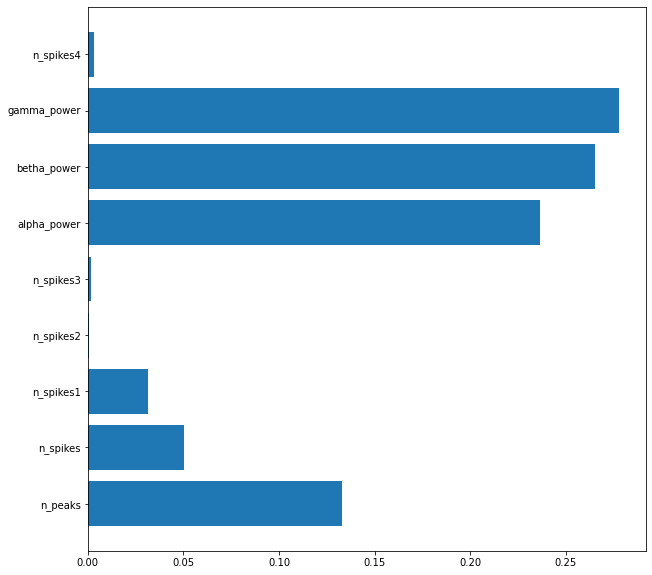

In [ ]:

X_train.columns

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns,clf.best_estimator_.feature_importances_ )

#Bagging Clasifier

In [ ]:
clf_BC = BaggingClassifier()
scores = cross_val_score(clf_BC, X_train, Y_train, cv=3)
clf_BC.fit(X_train, Y_train)
scores

array([0.5813837 , 0.59223879, 0.58848033])

In [ ]:
prediction_train_BC  = clf_BC.predict(X_train)
prediction_test_BC  = clf_BC.predict(X_test)
print(classification_report(Y_train, prediction_train_BC))
print(classification_report(Y_test, prediction_test_BC))

              precision    recall  f1-score   support

      normal       0.97      0.99      0.98     50605
   pre_ictal       0.99      0.97      0.98     45180

    accuracy                           0.98     95785
   macro avg       0.98      0.98      0.98     95785
weighted avg       0.98      0.98      0.98     95785

              precision    recall  f1-score   support

      normal       0.60      0.69      0.64     12652
   pre_ictal       0.58      0.48      0.53     11295

    accuracy                           0.59     23947
   macro avg       0.59      0.59      0.58     23947
weighted avg       0.59      0.59      0.59     23947



# Ada boost

In [ ]:
clf_ADB = AdaBoostClassifier()
scores = cross_val_score(clf_ADB, X_train, Y_train, cv=4, scoring = 'f1_weighted')
clf_ADB.fit(X_train, Y_train)
np.mean(scores)

0.572713520686206

In [ ]:
prediction_train_ADB  = clf_BC.predict(X_train)
prediction_test_ADB  = clf_BC.predict(X_test)
print(classification_report(Y_train, prediction_train_ADB))
print(classification_report(Y_test, prediction_test_ADB))

              precision    recall  f1-score   support

      normal       0.97      0.99      0.98     50605
   pre_ictal       0.99      0.97      0.98     45180

    accuracy                           0.98     95785
   macro avg       0.98      0.98      0.98     95785
weighted avg       0.98      0.98      0.98     95785

              precision    recall  f1-score   support

      normal       0.60      0.69      0.64     12652
   pre_ictal       0.58      0.48      0.53     11295

    accuracy                           0.59     23947
   macro avg       0.59      0.59      0.58     23947
weighted avg       0.59      0.59      0.59     23947



# Random Forest

In [ ]:
clf_RF = RandomForestClassifier()
scores = cross_val_score(clf_RF, X_train, Y_train, cv=4)
clf_RF.fit(X_train, Y_train)
np.mean(scores)

0.6064415599657071

In [ ]:
prediction_train_RF  = clf_RF.predict(X_train)
prediction_test_RF  = clf_RF.predict(X_test)
print(classification_report(Y_train, prediction_train_RF))
print(classification_report(Y_test, prediction_test_RF))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     50605
   pre_ictal       1.00      1.00      1.00     45180

    accuracy                           1.00     95785
   macro avg       1.00      1.00      1.00     95785
weighted avg       1.00      1.00      1.00     95785

              precision    recall  f1-score   support

      normal       0.63      0.64      0.63     12652
   pre_ictal       0.59      0.57      0.58     11295

    accuracy                           0.61     23947
   macro avg       0.61      0.61      0.61     23947
weighted avg       0.61      0.61      0.61     23947



## Tunning RF


In [ ]:
#dic_RF = { 'n_estimators': [30,40,50],
     #  'criterion': ['gini','entropy'],
    #   'max_depth': [20,30,25],
       #'min_samples_split': [int(m) for m in np.linspace(10,100,)],
       #
   #    'max_features':['auto', 'sqrt', 'log2']
  #     #'class_weight':['balanced', 'balanced_subsample', None]
 #      }


dic_RF = { 'n_estimators': [40],
       'criterion': ['entropy'],
       'max_depth': [20],
       #'min_samples_split': [int(m) for m in np.linspace(10,100,)],
       #
       'max_features':['sqrt']
       #'class_weight':['balanced', 'balanced_subsample', None]
       }
forest = RandomForestClassifier()
clf_RF = GridSearchCV(forest, dic_RF, verbose =10,n_jobs=-1, cv = 3)
clf_RF.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clf_RF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_RF.best_estimator_.feature_importances_

array([0.14857681, 0.04167048, 0.04299547, 0.00100661, 0.00195194,
       0.22067235, 0.25562962, 0.28370476, 0.00379196])

Text(0.5, 1.0, 'Importancia de los features')

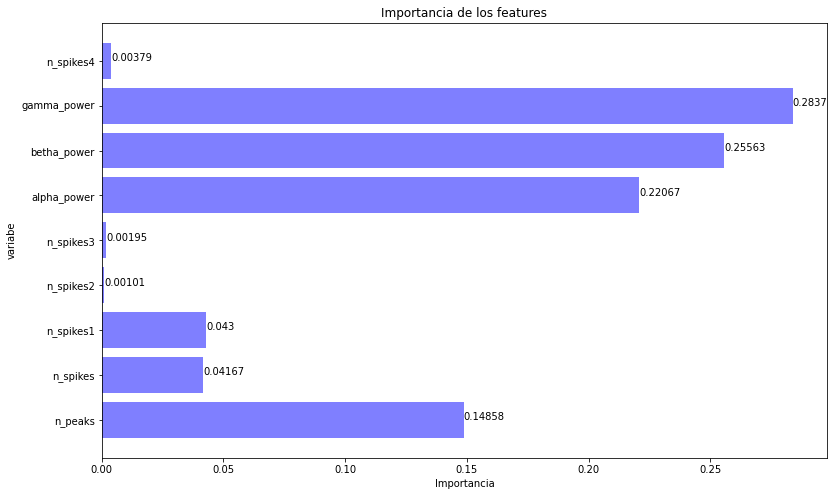

In [ ]:


X_train.columns

import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.barh(X_train.columns,clf_RF.best_estimator_.feature_importances_, color = 'blue', alpha = 0.5 )

rounded = [round(x,5) for x in clf_RF.best_estimator_.feature_importances_]
for index, value in enumerate(rounded):
    plt.text(value, index, str(value))

plt.xlabel('Importancia')
plt.ylabel('variabe')
plt.title('Importancia de los features')

In [ ]:
prediction_train_RF  = clf_RF.best_estimator_.predict(X_train)
prediction_test_RF  = clf_RF.best_estimator_.predict(X_test)
print(classification_report(Y_train, prediction_train_RF))
print(classification_report(Y_test, prediction_test_RF))

              precision    recall  f1-score   support

      normal       0.90      0.76      0.82     50605
   pre_ictal       0.77      0.90      0.83     45180

    accuracy                           0.83     95785
   macro avg       0.83      0.83      0.83     95785
weighted avg       0.84      0.83      0.83     95785

              precision    recall  f1-score   support

      normal       0.66      0.59      0.62     12652
   pre_ictal       0.59      0.66      0.62     11295

    accuracy                           0.62     23947
   macro avg       0.62      0.62      0.62     23947
weighted avg       0.62      0.62      0.62     23947



In [ ]:
from sklearn.metrics import roc_auc_score
Y_test_DT = Y_test.replace({'pre_ictal':1, 'normal':0})

predictions_test = pd.Series(prediction_test_RF).replace({'pre_ictal':1, 'normal':0})
print(roc_auc_score(Y_test_DT,predictions_test ))

0.622856965015898
